In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

# Problem 8: Kernelized linear regression

(-10.0, 10.0)

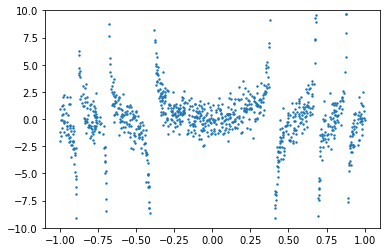

In [28]:
# let us generate some data
m = 1000
x = -1 + 2 * np.random.rand(m)
y = np.tan(10*x**2)+np.random.randn(m)
plt.scatter(x,y,s=2) # s controls the size of the data points
plt.ylim([-10,10])

Your goal is to fit a **Kernelized Linear Regression Model** to the data points, and plot the model.
You will use three kernels

- Gaussian kernel $k(x,z)=e^{-\gamma \|x-z\|^2}$, 
- Sigmoid kernel $k(x,z)=\tanh(\gamma xz^T+r)$, and
- Polynomial kernel $k(x,z)=(1+xz^T)^d$,

where $\gamma$, $r$ and $d$ are parameters (chosen by you).

In [29]:
# cast x as a column vector
x = x.reshape(-1,1)

## Part 1: Gaussian kernel

In [15]:
# distance matrix
from sklearn.metrics import pairwise_distances
dist = pairwise_distances(x)

In [18]:
gamma = 10
K = np.exp(-gamma*dist**2)
alpha = np.linalg.lstsq(K,y,rcond=None)[0]

(-10.0, 10.0)

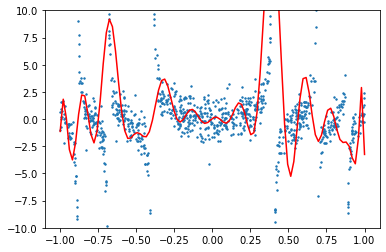

In [19]:
m_plot = 100
x_plot = np.linspace(-1,1,m_plot)
dist_plot = pairwise_distances(x_plot.reshape(m_plot,1),x.reshape(m,1))
K_plot = np.exp(-gamma*dist_plot**2)
y_plot = K_plot.dot(alpha)

plt.scatter(x,y,s=2)
plt.plot(x_plot,y_plot,'r')
plt.ylim([-10,10])

## Part 2: Sigmoid kernel

In [58]:
gamma = 1
r = 1
K = np.tanh(r+gamma*x.dot(x.T))
alpha = np.linalg.lstsq(K,y,rcond=None)[0]

In [56]:
x.dot(x.T)

array([[ 0.17907348,  0.07891477,  0.25326382, ...,  0.1030923 ,
        -0.19583602,  0.36544026],
       [ 0.07891477,  0.03477646,  0.11160925, ...,  0.0454311 ,
        -0.08630175,  0.16104358],
       [ 0.25326382,  0.11160925,  0.35819129, ...,  0.14580355,
        -0.27697109,  0.51684255],
       ...,
       [ 0.1030923 ,  0.0454311 ,  0.14580355, ...,  0.05935006,
        -0.11274246,  0.21038334],
       [-0.19583602, -0.08630175, -0.27697109, ..., -0.11274246,
         0.21416764, -0.39964803],
       [ 0.36544026,  0.16104358,  0.51684255, ...,  0.21038334,
        -0.39964803,  0.74576415]])

(-10.0, 10.0)

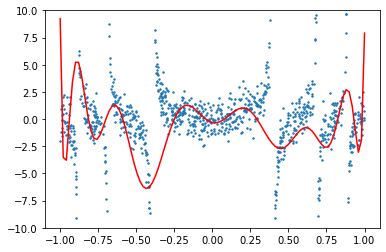

In [59]:
# plot results
m_plot = 100
x_plot = np.linspace(-1,1,m_plot).reshape(-1,1)
K_plot = np.tanh(r+gamma*x_plot.dot(x.T))
y_plot = K_plot.dot(alpha)

plt.scatter(x,y,s=2)
plt.plot(x_plot,y_plot,'r')
plt.ylim([-10,10])

## Part 3: Polynomial kernel

In [13]:
d = 30
K = (1+x.dot(x.T))**d
# solve least squares problem
alpha = np.linalg.lstsq(K,y,rcond=None)[0]

(-10.0, 10.0)

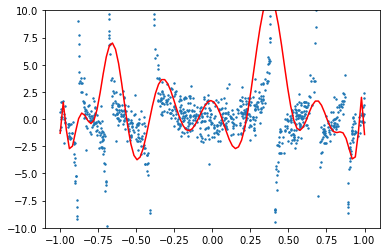

In [14]:
# plot results
m_plot = 100
x_plot = np.linspace(-1,1,m_plot).reshape(-1,1)
K_plot = (1+x_plot.dot(x.T))**d
y_plot = K_plot.dot(alpha)

plt.scatter(x,y,s=2)
plt.plot(x_plot,y_plot,'r')
plt.ylim([-10,10])